In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# 1. Загрузка данных
data = pd.read_csv('train.csv', delimiter=',', thousands='.', decimal=',')  # Замените 'train.csv' на ваш файл
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

In [43]:
data.columns = data.columns.str.strip()

In [44]:
# 2. Анализ за все время
all_time_sales = data['Sub-Category'].value_counts().head(4)

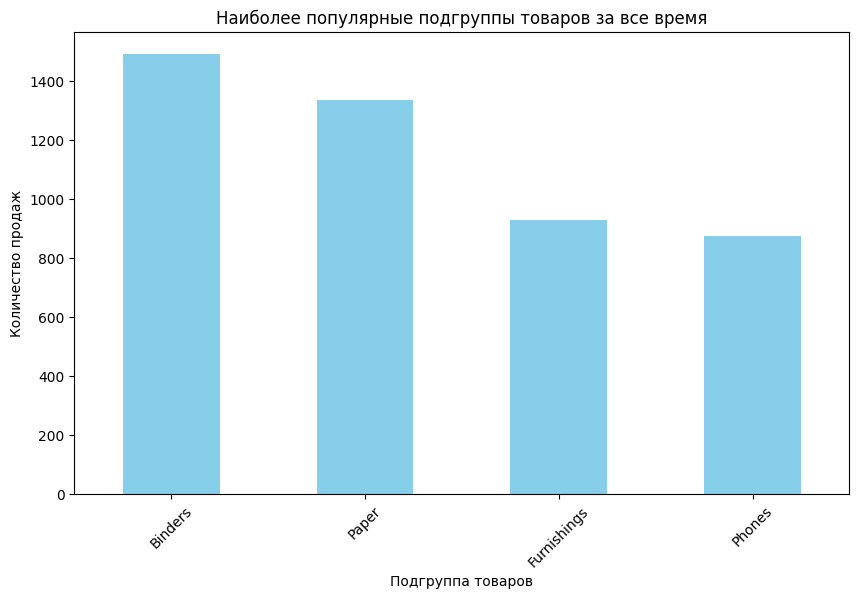

In [45]:
plt.figure(figsize=(10, 6))
all_time_sales.plot(kind='bar', color='skyblue')
plt.title('Наиболее популярные подгруппы товаров за все время')
plt.xlabel('Подгруппа товаров')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()

In [46]:
# 3. Анализ за последние 2 года
last_two_years = data[data['Order Date'] >= pd.Timestamp.now() - pd.DateOffset(years=2)]

if not last_two_years.empty:
    last_two_years_sales = last_two_years['Sub-Category'].value_counts().head(4)

    # Визуализация
    plt.figure(figsize=(10, 6))
    last_two_years_sales.plot(kind='bar', color='lightgreen')
    plt.title('Наиболее популярные подгруппы товаров за последние 2 года')
    plt.xlabel('Подгруппа товаров')
    plt.ylabel('Количество продаж')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Нет данных за последние 2 года.")

Нет данных за последние 2 года.


In [47]:
# 4. Анализ за последний год
last_year = data[data['Order Date'] >= pd.Timestamp.now() - pd.DateOffset(years=1)]

if not last_year.empty:
    last_year_sales = last_year['Sub-Category'].value_counts().head(4)
    
    plt.figure(figsize=(10, 6))
    last_year_sales.plot(kind='bar', color='salmon')
    plt.title('Наиболее популярные подгруппы товаров за последний год')
    plt.xlabel('Подгруппа товаров')
    plt.ylabel('Количество продаж')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Нет данных за последний год.")

Нет данных за последний год.


In [48]:
# На основе представленных результатов и графиков можно сделать несколько выводов:

# Популярные подгруппы товаров за все время:
# Наиболее часто покупаемыми подгруппами товаров являются Binders, Paper, Furnishings и Phones. 
# Из графика видно, что Binders и Paper имеют значительное преимущество по количеству продаж в сравнении с другими подгруппами.
# Отсутствие данных за последние два года и последний год.

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('train.csv', delimiter=',', thousands='.', decimal=',')

In [50]:
print(data['Sales'].dtype)

float64


In [51]:
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')

In [52]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [53]:
filtered_data_iqr = data[(data['Sales'] >= lower_bound) & (data['Sales'] <= upper_bound)]

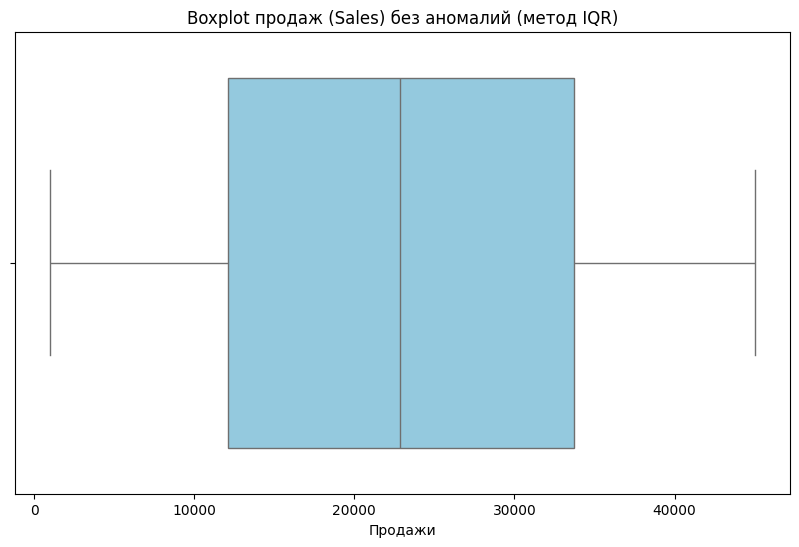

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data_iqr['Sales'], color='skyblue')
plt.title('Boxplot продаж (Sales) без аномалий (метод IQR)')
plt.xlabel('Продажи')
plt.show()

In [55]:
mean_sales = data['Sales'].mean()
std_sales = data['Sales'].std()
lower_bound_3sig = mean_sales - 3 * std_sales
upper_bound_3sig = mean_sales + 3 * std_sales

In [56]:
filtered_data_3sig = data[(data['Sales'] >= lower_bound_3sig) & (data['Sales'] <= upper_bound_3sig)]

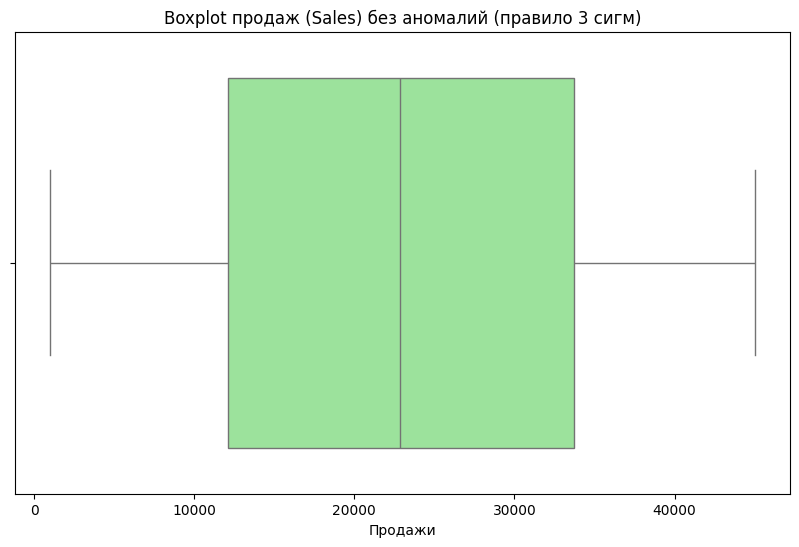

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data_3sig['Sales'], color='lightgreen')
plt.title('Boxplot продаж (Sales) без аномалий (правило 3 сигм)')
plt.xlabel('Продажи')
plt.show()

In [58]:
#Выводы на основе boxplot’ов:

# Boxplot без аномалий (метод IQR):
# Большинство значений продаж находится в пределах 20,000 - 30,000.
# Это указывает на то, что основной объем продаж концентрируется в этом диапазоне.
# Границы усов показывают, что есть достаточно узкий диапазон значений, что означает относительно однородные продажи без значительных выбросов.


# Boxplot без аномалий (правило 3 сигм):

# Похожий результат, где основной диапазон также остается сосредоточенным в пределах 20,000 - 30,000.
# Усы немного длиннее по сравнению с IQR, что может указывать на широкий разброс значений. 
# Это может быть связано с наличием более жёстких или значительных выбросов по методу 3 сигм.

# Сравнение методов: Оба метода показывают схожие результаты в отношении распределения продаж, 
# однако метод IQR может быть более безопасным в контексте управления выбросами.


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('train.csv', delimiter=',', thousands='.', decimal=',')
data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')

In [60]:
def categorize_sales(sales):
    if sales < 20000:
        return 'Низкие продажи'
    elif 20000 <= sales <= 40000:
        return 'Средние продажи'
    else:
        return 'Высокие продажи'

data['Sale_group'] = data['Sales'].apply(categorize_sales)

In [61]:
grouped_data = data.groupby(['Region', 'Sale_group']).agg({'Sales': 'sum'}).reset_index()

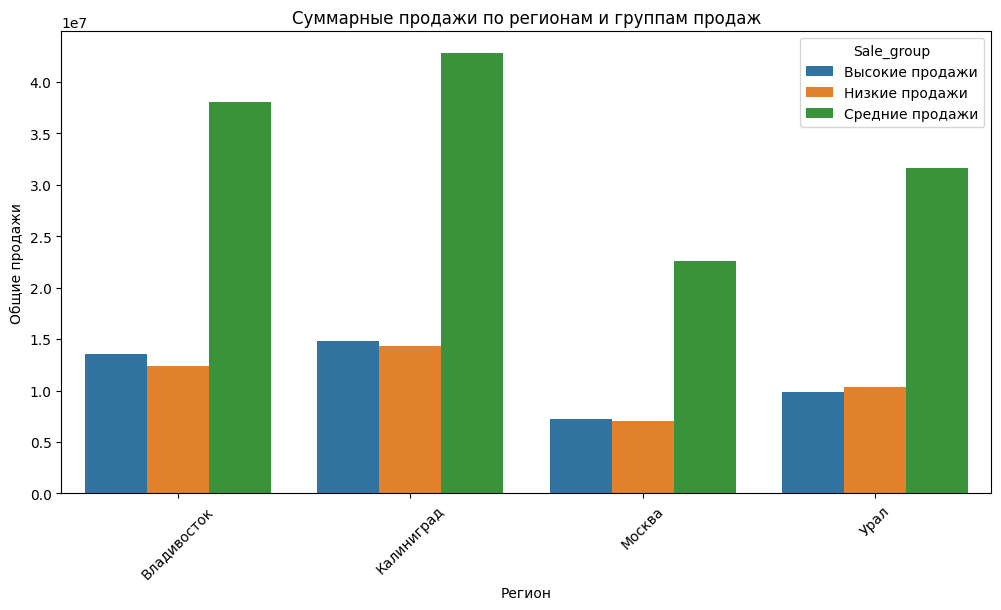

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Region', y='Sales', hue='Sale_group')
plt.title('Суммарные продажи по регионам и группам продаж')
plt.ylabel('Общие продажи')
plt.xlabel('Регион')
plt.xticks(rotation=45)
plt.show()

In [63]:
max_profit_group = grouped_data.loc[grouped_data['Sales'].idxmax()]
print("Наиболее прибыльная группа: Region:", max_profit_group['Region'], "Sale_group:", max_profit_group['Sale_group'], "Sales:", max_profit_group['Sales'])

Наиболее прибыльная группа: Region: Калиниград Sale_group: Средние продажи Sales: 42750144.5
